 -   retains memory of forming clusters in sequence which is saved in "Dendogram"

### Consists of 2 types

#### 1) Agglomerative

1) Consider each data point as one cluster. [N clusters]

2) Group two closest clusters so that there is one less cluster [N-1 clusters]

3) Keep on grouping the closest clusters in iteration until you are left with one cluster

#### 2) Divisive (not much used in real world)

opposite of Agglomerative. We consider all data points to be part of one huge cluster. We then separate a data point in each iteration which are not similar until we are left with N clusters 


### Measuring distance between two clusters/Calculating similarity: (depends on the business problem)
![title](Capture3.png)

#### Option 1:  Min AKA single linkage algorithm by taking closest points which give minimum similarity

Adv: can separate non-elliptical shapes

Disadv: cannot separate clusters properly if there is noise

#### Option 2: Max AKA complete linkage algorithm by taking furthest points. 

Adv: works well with noise

Disadv: favours globular clusters, tends to break large clusters

#### Option 3: Group Average: Take all the pairs of points and compute their similarities and calculate the average of the similarities.

(same adv and disadv as Max)

#### Option 4: Compute centroids and take similarity between centroids as similiarity of clusters. 

less popular technique in real world.

#### Option 5: Ward's method: same as Group Average just taking sum of squares of similiarities

(same adv and disadv as Max)

### Example of dendogram 
![title](Dendo.png)

### By setting distance thresholds on dendograms (horizontal line at a particular Euclidean distance) we can find out number of clusters and decide overall how many clusters are suitable. 

### Deciding optimal number of clusters by using dendograms:

- extend each horizontal line and cancel out all the vertical lines of clusters which cut through the horizontal lines. The remaining number of vertical lines which do not intersect tell the number of optimal clusters.

![title](dendo2.png)

## Limitations of Hierarchal technique:

1) all approaches to calculate similarity have disadvantages. 

2) high space and time complexity required.(space complexity as similarity matrix must be stored in RAM. time complexity as similarities calculated in each iteration). So can not work well for huge data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
file = pd.read_csv("Mall_Customers.csv")
file.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = file.iloc[:,[3,4]].values

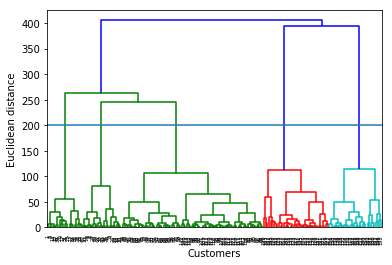

In [8]:
#Using dendrogram to find optimal clusters

import scipy.cluster.hierarchy as sch

dendo = sch.dendrogram(sch.linkage(x,'ward')) #using ward method 
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.axhline(200)
plt.show()

#Optimal number of clusters is 5

In [14]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(x)


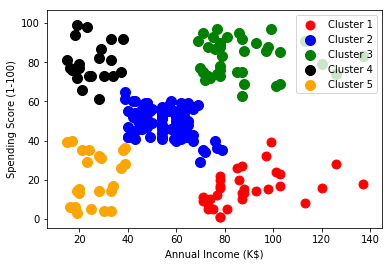

In [16]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=80, c='red', label="Cluster 1")
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='black', label="Cluster 4")
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='orange', label="Cluster 5")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc=1)
plt.show()